In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [172]:
# Data Loading & Initial Exploratory Data Analysis (EDA) 
print("--- Data Loading & Initial EDA ---")

try:
    df = pd.read_csv('data/Pumpkin_Seeds_Dataset.csv', encoding='latin1')# this because the dataset contains non-ASCII characters instead of UTF-8
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Pumpkin_Seeds_Dataset.csv' not found.")
    print("Please ensure the dataset is in a 'data' subdirectory in the same directory as the script.")
    exit() # Exit the script if the file is not found

--- Data Loading & Initial EDA ---
Dataset loaded successfully.


In [173]:
# Display the first 5 rows of the DataFrame to get a sense of the data structure.
print("\n--- Head of the dataset ---")
print(df.head())
print("\n" + "="*30 + "\n") # Separator for readability


--- Head of the dataset ---
    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness       Class  
0       0.8207  Çerçev

In [174]:
# Print concise information about the DataFrame, including data types and non-null counts.
print("--- Dataset Info ---")
print(df.info())
print("\n" + "="*30 + "\n")

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB
None




In [175]:
# Generate descriptive statistics of the numerical columns (mean, std, min, max, quartiles).
print("--- Dataset Description ---")
print(df.describe())
print("\n" + "="*30 + "\n")

--- Dataset Description ---
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0

In [176]:
# Count the occurrences of each unique value in the 'Class' column to check class distribution.
print("--- Class Distribution ---")
print(df['Class'].value_counts())
print("\n" + "="*30 + "\n")

--- Class Distribution ---
Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64




In [177]:
# Store original column names before separating X and y for later reference
original_feature_names = df.drop(columns=['Class']).columns.tolist()

In [178]:
# Data Preprocessing
# Separate features (X) and the target variable (y) from the original DataFrame
X_original = df.drop(columns=['Class'])
y = df['Class']

In [179]:
#Test-train split (using the original feature set)
# 80% of the data is used for training (test_size = 0.2 means 20% for testing).
# random_state = 42 ensures reproducibility of the split.
X_train_original, X_test_original, y_train, y_test = train_test_split(
    X_original, y, test_size=0.2, random_state=42
)

In [180]:
# Feature Scaling (using the original feature set)
scaler_original = StandardScaler() # this generates a mean of 0 and std of 1 for each feature.
X_train_scaled_original = scaler_original.fit_transform(X_train_original) # always fit on the training data only.
# Transform the test data using the *same* scaler fitted on the training data.
X_test_scaled_original = scaler_original.transform(X_test_original)

In [181]:
# --- Train and Evaluate the Initial Model (all features) ---
print("--------- Train and Evaluate the Initial Model (all features) --------")
# Initialize the Logistic Regression model.
model_original = LogisticRegression()
# Train the model using the scaled training data.
model_original.fit(X_train_scaled_original, y_train)
# Make predictions on the scaled test data.
y_pred_original = model_original.predict(X_test_scaled_original)
print("--- model successfully trained and predictions made on the test set---")

--------- Train and Evaluate the Initial Model (all features) --------
--- model successfully trained and predictions made on the test set---


In [182]:
# Evaluate the model's performance using common metrics at the default threshold (0.5).
print("--- Model Evaluation (Original Data - Default Threshold) ---")
accuracy_original = metrics.accuracy_score(y_test, y_pred_original)
classification_report_original = metrics.classification_report(y_test, y_pred_original)
confusion_matrix_original = metrics.confusion_matrix(y_test, y_pred_original)

print("Accuracy:", accuracy_original)
print("Classification Report:\n", classification_report_original)
print("---------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix_original)
print("\n" + "="*30 + "\n")

--- Model Evaluation (Original Data - Default Threshold) ---
Accuracy: 0.856
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.83      0.89      0.86       251
Ürgüp Sivrisi       0.88      0.82      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

---------------------------------------------
Confusion Matrix:
 [[224  27]
 [ 45 204]]




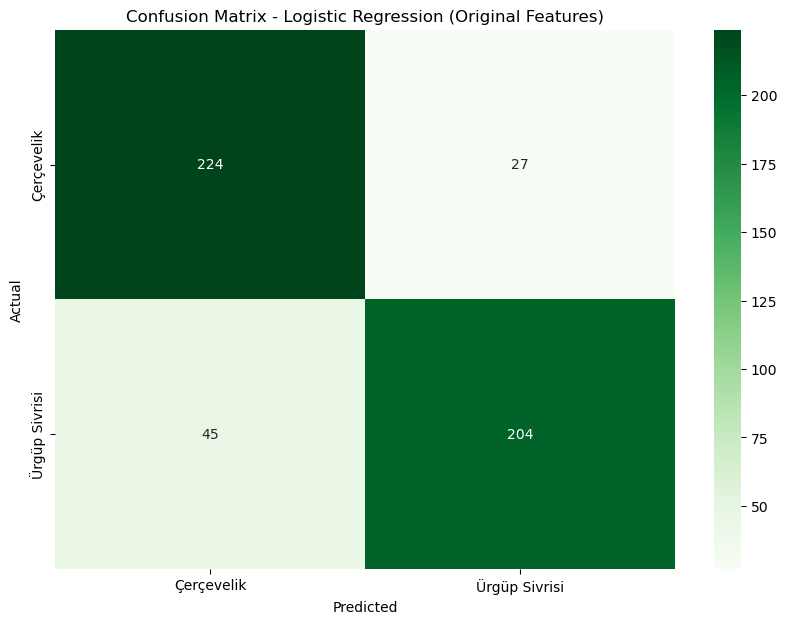

In [183]:
# Plotting the Confusion Matrix heatmap (Original Data)
cm_original = confusion_matrix(y_test, y_pred_original)
labels_original = model_original.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Greens', xticklabels=labels_original, yticklabels=labels_original)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Original Features)')
plt.savefig('confusion_matrix_logistic_regression_original.png')
# plt.show() # Uncomment this line if you are running this in an environment that displays plots


--- ROC AUC Analysis (Original Model) ---
ROC AUC Score (Original Model): 0.923




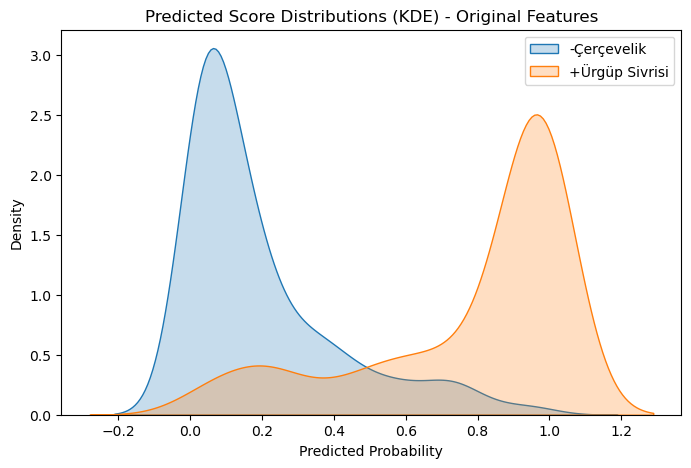

In [184]:
# ROC AUC (Original Data)
print("--- ROC AUC Analysis (Original Model) ---")
# Convert the true test labels to binary format (0 and 1).
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel() # Flatten the array to 1D

# Get the predicted probabilities for the positive class from the original model.
y_probs_original = model_original.predict_proba(X_test_scaled_original)[:, 1]

# Compute and print the ROC AUC score.
auc_score_original = roc_auc_score(y_test_bin, y_probs_original)
print(f"ROC AUC Score (Original Model): {auc_score_original:.3f}")
print("\n" + "="*30 + "\n")

# Plot Predicted Score Distributions (Original Data)
# Separate the predicted probabilities based on the actual class.
neg_scores_original = y_probs_original[y_test_bin == 0] # Probabilities for actual negative instances
pos_scores_original = y_probs_original[y_test_bin == 1] # Probabilities for actual positive instances
class_names_original = model_original.classes_ # Get the actual class names so i can display them in the plot.
neg_class_name_original = class_names_original[0] 
pos_class_name_original = class_names_original[1] 

plt.figure(figsize=(8,5))
sns.kdeplot(neg_scores_original, shade=True, label= (f"-{neg_class_name_original}"))
sns.kdeplot(pos_scores_original, shade=True, label= (f"+{pos_class_name_original}"))
plt.xlabel('Predicted Probability')
plt.ylabel('Density') 
plt.title('Predicted Score Distributions (KDE) - Original Features') 
plt.legend() 
plt.savefig('predicted_score_distributions_original.png')
# plt.show()

In [185]:
# --- Interpret the Coefficients of the Initial Model ---
print("--- Interpret the Coefficients of the Initial Model ---")

# Get the intercept (log-odds of positive class when all features are 0)
intercept_original = model_original.intercept_[0] 

# Get the coefficients for each feature
coefficients_original = model_original.coef_[0]

print("--- Model Intercept (Original Model) ---")
print(f"Intercept: {intercept_original:.4f}")
print("\n" + "="*30 + "\n")

print("--- Model Coefficients (Original Model) ---")
# Print each feature name and its corresponding coefficient
for feature, coef in zip(original_feature_names, coefficients_original):
    print(f"Feature: {feature:<20} | Coefficient: {coef:.4f}")
print("\n" + "="*30 + "\n")


print("--- Interpretation and Next Steps ---")
print("The coefficients indicate the change in the log-odds of the positive class (Ürgüp Sivrisi)")
print("for a one-unit increase in the scaled feature value, holding other features constant.")
print("Features with  coefficients close to zero have a weaker linear association.")
print("Based on these results, 'Major_Axis_Length' (-0.0983) and 'Extent' (0.0963) have the smallest absolute coefficients.")
print("We will now explore if removing these features impacts the model's performance.")
print("\n" + "="*30 + "\n")

print("--- Dropping Features with Small Coefficients ---")
columns_to_drop = ['Major_Axis_Length', 'Extent']

print(f"Attempting to drop columns: {columns_to_drop}")

# Create a new DataFrame by dropping the specified columns from the original DataFrame (df)
# This ensures we start from the original data structure before dropping.
try:
    df_reduced = df.drop(columns=columns_to_drop)
    print("\n-------df after droping columns-------")
    print(df_reduced.columns)
except KeyError as e:
    print(f"\nError dropping columns: {e}")
    print("Please ensure the column names to drop are correct and exist in the DataFrame.")
    print("Exiting script.")
    exit() # Exit the script if columns cannot be dropped

--- Interpret the Coefficients of the Initial Model ---
--- Model Intercept (Original Model) ---
Intercept: 0.2019


--- Model Coefficients (Original Model) ---
Feature: Area                 | Coefficient: 2.1904
Feature: Perimeter            | Coefficient: -1.5939
Feature: Major_Axis_Length    | Coefficient: -0.0983
Feature: Minor_Axis_Length    | Coefficient: -0.7539
Feature: Convex_Area          | Coefficient: 2.0125
Feature: Equiv_Diameter       | Coefficient: -2.0061
Feature: Eccentricity         | Coefficient: -1.5823
Feature: Solidity             | Coefficient: 0.5646
Feature: Extent               | Coefficient: 0.0963
Feature: Roundness            | Coefficient: -1.1730
Feature: Aspect_Ration        | Coefficient: 1.8929
Feature: Compactness          | Coefficient: -1.9228


--- Interpretation and Next Steps ---
The coefficients indicate the change in the log-odds of the positive class (Ürgüp Sivrisi)
for a one-unit increase in the scaled feature value, holding other features c

In [186]:
# --- Train and Evaluate the Second Model (reduced features) ---
print("\n--- Train and Evaluate the Second Model without the dropped columns(features) ---")

# rename your X variable to avoid confusion with the original X
X_reduced = df_reduced.drop(columns=['Class']) # df_reduced is our dataframe we work with now.
# y remains the same as it was not affected by dropping feature columns

# Use the same random_state as before for consistency in the split
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)
# y remains the same as it was not affected by dropping feature columns

# Need a new scaler for the reduced feature set as the number of features changed
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

# Train the Logistic Regression model on the reduced data
model_reduced = LogisticRegression()
model_reduced.fit(X_train_scaled_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_scaled_reduced)

# --- Compare the performance of the two models (at default threshold) ---
print("--- Comparison of Model Performance (Default Threshold) ---")

# Evaluate the reduced model at the default threshold
accuracy_reduced = metrics.accuracy_score(y_test, y_pred_reduced)
classification_report_reduced = metrics.classification_report(y_test, y_pred_reduced)
confusion_matrix_reduced = metrics.confusion_matrix(y_test, y_pred_reduced)

print("--- Evaluation for Original Model (Default Threshold) ---")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", classification_report_original)
print("---------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix_original)
print("\n")

print("--- Evaluation for Reduced Model (Default Threshold) ---")
print("Accuracy:", accuracy_reduced)
print("Classification Report:\n", classification_report_reduced)
print("---------------------------------------------------")
print("Confusion Matrix:\n", confusion_matrix_reduced)
print("\n" + "="*30 + "\n")




--- Train and Evaluate the Second Model without the dropped columns(features) ---
--- Comparison of Model Performance (Default Threshold) ---
--- Evaluation for Original Model (Default Threshold) ---
Accuracy: 0.856
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.83      0.89      0.86       251
Ürgüp Sivrisi       0.88      0.82      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

---------------------------------------------------
Confusion Matrix:
 [[224  27]
 [ 45 204]]


--- Evaluation for Reduced Model (Default Threshold) ---
Accuracy: 0.858
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.84      0.89      0.86       251
Ürgüp Sivrisi       0.88      0.82      0.85       249

     accuracy                           0.86       500
    macro a

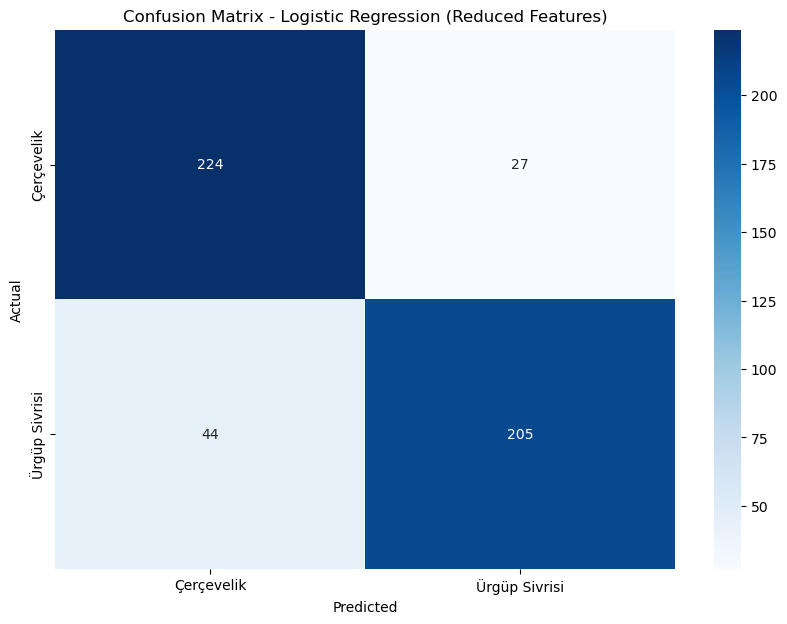

In [187]:
# Plotting the Confusion Matrix heatmap (Reduced Data) for visual comparison
cm_reduced = confusion_matrix(y_test, y_pred_reduced)
labels_reduced = model_reduced.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm_reduced, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reduced, yticklabels=labels_reduced)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Reduced Features)')
plt.savefig('confusion_matrix_logistic_regression_reduced.png')
# plt.show() # Uncomment to display plot

In [188]:
# --- 7. Perform Threshold Optimization (on the Reduced Model) ---
print("--- 7. Threshold Optimization (on the Reduced Model) ---")
print("We will now find the optimal classification threshold for the reduced model")
print("to maximize the F1-score.")

# Get the predicted probabilities for the positive class from the reduced model
y_probs_reduced = model_reduced.predict_proba(X_test_scaled_reduced)[:, 1]

# Calculate ROC AUC for the reduced model
auc_score_reduced = roc_auc_score(y_test_bin, y_probs_reduced)
print(f"ROC AUC Score (Reduced Model): {auc_score_reduced:.3f}")
print("\n")

# choosing the optimal threshold for classification (on Reduced Data)
thresholds = np.linspace(0, 1, 101) # Check 101 thresholds between 0 and 1
f1_scores_reduced = []
# Iterate through each threshold to calculate the F1 score.
for t in thresholds:
    # Classify instances based on the current threshold.
    preds_reduced = (y_probs_reduced >= t).astype(int)
    # Calculate the F1 score for the current predictions and true labels.
    f1_scores_reduced.append(f1_score(y_test_bin, preds_reduced))

    # Find the index of the threshold that resulted in the highest F1 score.
best_idx_reduced = np.argmax(f1_scores_reduced)
# Get the best threshold value.
best_t_reduced = thresholds[best_idx_reduced]
# Get the corresponding best F1 score.
best_f1_reduced = f1_scores_reduced[best_idx_reduced]
print(f"Best threshold (Reduced Model, F1-optimized) = {best_t_reduced:.2f}, F1 = {best_f1_reduced:.2f}")
print("\n")

--- 7. Threshold Optimization (on the Reduced Model) ---
We will now find the optimal classification threshold for the reduced model
to maximize the F1-score.
ROC AUC Score (Reduced Model): 0.924


Best threshold (Reduced Model, F1-optimized) = 0.46, F1 = 0.86




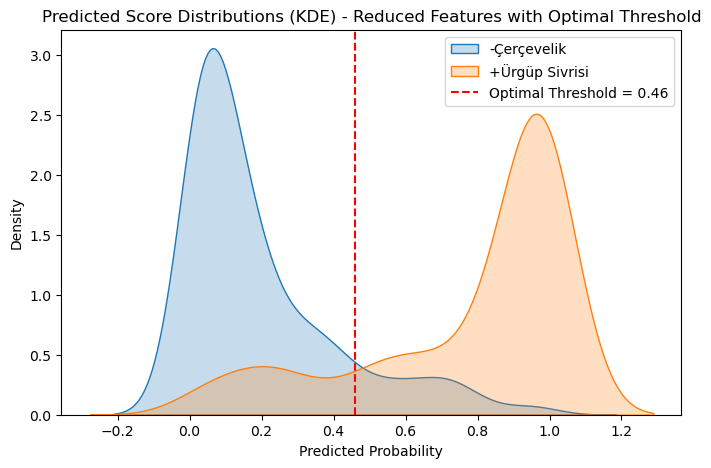

In [189]:
# Separate scores for plotting (using probabilities from the reduced model)
neg_scores_reduced = y_probs_reduced[y_test_bin == 0]
pos_scores_reduced = y_probs_reduced[y_test_bin == 1]
# Class names are the same as before
class_names_reduced = model_reduced.classes_
neg_class_name_reduced = class_names_reduced[0]
pos_class_name_reduced = class_names_reduced[1]


# Plot Predicted Score Distributions with Optimal Threshold (Reduced Data)
plt.figure(figsize=(8,5))
sns.kdeplot(neg_scores_reduced, shade=True, label= (f"-{neg_class_name_reduced}"))
sns.kdeplot(pos_scores_reduced, shade=True, label= (f"+{pos_class_name_reduced}"))

# Add a vertical line at the optimal threshold for the reduced model
plt.axvline(x=best_t_reduced, color='red', linestyle='--', label=f'Optimal Threshold = {best_t_reduced:.2f}')

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Predicted Score Distributions (KDE) - Reduced Features with Optimal Threshold')
plt.legend()
plt.savefig('predicted_score_distributions_reduced_with_threshold.png')
# plt.show()

In [190]:
# Applying the best threshold to get final predictions (on Reduced Data)
final_preds_reduced = (y_probs_reduced >= best_t_reduced).astype(int)

print("--- Model Evaluation (Reduced Model - Adjusted Threshold) ---")
print("Accuracy after adjusting threshold :", metrics.accuracy_score(y_test_bin, final_preds_reduced))
print("Confusion Matrix after adjusting threshold:\n", confusion_matrix(y_test_bin, final_preds_reduced))
print("\nClassification Report after adjusting threshold:\n", metrics.classification_report(y_test_bin, final_preds_reduced, target_names=class_names_reduced ))
print("\n" + "="*30 + "\n")

print("--- Analysis Complete ---")
print("The script has performed logistic regression, interpreted coefficients,")
print("explored feature selection, compared models, and optimized the classification threshold.")
print("Review the output and generated plots to understand the model's performance.")



--- Model Evaluation (Reduced Model - Adjusted Threshold) ---
Accuracy after adjusting threshold : 0.864
Confusion Matrix after adjusting threshold:
 [[222  29]
 [ 39 210]]

Classification Report after adjusting threshold:
                precision    recall  f1-score   support

   Çerçevelik       0.85      0.88      0.87       251
Ürgüp Sivrisi       0.88      0.84      0.86       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500



--- Analysis Complete ---
The script has performed logistic regression, interpreted coefficients,
explored feature selection, compared models, and optimized the classification threshold.
Review the output and generated plots to understand the model's performance.


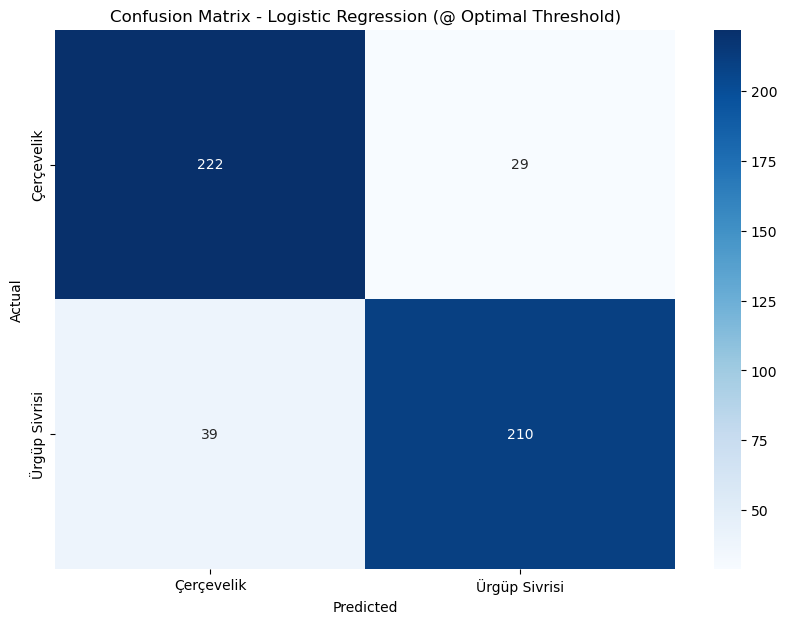

In [191]:
# Plotting the Confusion Matrix heatmap when the threshold is adjusted (Reduced Data)
cm_thres = confusion_matrix(y_test_bin, final_preds_reduced)
labels_reduced = model_reduced.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm_thres, annot=True, fmt='d', cmap='Blues', xticklabels=labels_reduced, yticklabels=labels_reduced)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (@ Optimal Threshold)')
plt.savefig('confusion_matrix_logistic_regression@threshold.png')
# plt.show() # Uncomment to display plot